/var/folders/0w/4d7v1n1s7wd7n4dnv5f69jbh0000gn/T/ipykernel_44657/3892645747.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/var/folders/0w/4d7v1n1s7wd7n4dnv5f69jbh0000gn/T/ipykernel_44657/3892645747.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Weights: [ 2.10608887e-01 -2.68996189e-01  2.83930567e+00 -8.71421783e-02
 -4.90644741e-02 -2.01789564e-02  2.43870571e-03 -2.75077985e-02
  2.65525905e+00]
Bias: -0.12864919776346176
Weights: [ 0.12468871 -0.22043116  0.38878229 -0.06943488 -1.61642536  0.13203367
 -0.19458734  0.18156004  0.79257109]
Bias: -0.6959429679818255
Today's Rain Prediction - Training Accuracy: 64.97%
Today's Rain Prediction - Testing Accuracy: 68.25%
Tomorrow's Rain Prediction - Training Accuracy: 74.66%
Tomorrow's Rain Prediction - Testing Accuracy: 77.64%


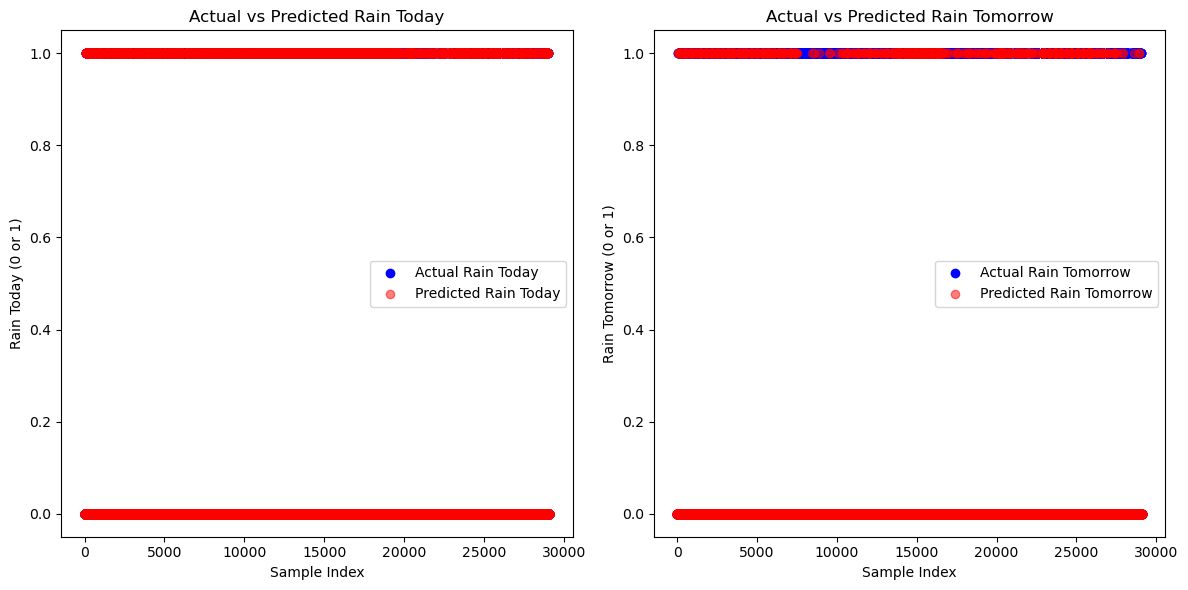

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/Users/vanshpahwa/Downloads/weatherAUS.csv")

# Handling columns with numeric values and missing values
numeric_missing = df.select_dtypes(include=[np.number]).isnull().any()
numeric_missing_columns = numeric_missing[numeric_missing].index.tolist()

# Fill missing values in numeric columns with their mean
for column in numeric_missing_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Handling columns with non-numeric values and missing values
non_numeric_missing = df.select_dtypes(exclude=[np.number]).isnull().any()
non_numeric_missing_columns = non_numeric_missing[non_numeric_missing].index.tolist()

# Fill missing values in non-numeric columns with their respective modes
for column in non_numeric_missing_columns:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)

# Encoding categorical variables
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Prepare the data
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
         'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'RainToday']].values  # Features
Y1 = df['RainToday'].values  # Target variable for today's rain
Y2 = df['RainTomorrow'].values  # Target variable for tomorrow's rain

# Split the data into training and testing sets (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
Y1_train, Y1_test = Y1[:split_index], Y1[split_index:]
Y2_train, Y2_test = Y2[:split_index], Y2[split_index:]

class LogisticRegression:
    def __init__(self, lr=0.01, iters=1000):
        self.lr = lr
        self.iters = iters 

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        self.m, self.n = X.shape  # Get number of samples and features
        self.w = np.zeros((self.n, 1))  # Initialize weights
        self.b = 0  # Initialize bias
        for _ in range(self.iters):
            self.update_weights(X, Y)    

    def update_weights(self, X, Y):
        linear_model = np.dot(X, self.w) + self.b  # Linear model
        Y_predicted = self.sigmoid(linear_model)  # Sigmoid activation
        dw = (1 / self.m) * np.dot(X.T, (Y_predicted - Y.reshape(-1, 1)))  # Gradient for weights
        db = (1 / self.m) * np.sum(Y_predicted - Y.reshape(-1, 1))  # Gradient for bias
        self.w -= self.lr * dw  # Update weights
        self.b -= self.lr * db  # Update bias    

    def predict(self, X):
        linear_model = np.dot(X, self.w) + self.b
        Y_predicted = self.sigmoid(linear_model)
        return (Y_predicted >= 0.5).astype(int)  # Convert probabilities to class labels

    def print_weights(self):
        print("Weights:", self.w.flatten())
        print("Bias:", self.b)

# Model for predicting today's rain
model1 = LogisticRegression(lr=0.01, iters=10000)
model1.fit(X_train, Y1_train)
model1.print_weights()

# Model for predicting tomorrow's rain
model2 = LogisticRegression(lr=0.01, iters=10000)
model2.fit(X_train, Y2_train)
model2.print_weights()

# Predictions
y1_pred_train = model1.predict(X_train)
y1_pred_test = model1.predict(X_test)
y2_pred_train = model2.predict(X_train)
y2_pred_test = model2.predict(X_test)

# Calculate accuracy for both models
def calculate_accuracy(Y_true, Y_pred):
    return np .mean(Y_true == Y_pred) * 100  # Return percentage accuracy

# Accuracy for today's rain prediction
accuracy_y1_train = calculate_accuracy(Y1_train, y1_pred_train)
accuracy_y1_test = calculate_accuracy(Y1_test, y1_pred_test)

# Accuracy for tomorrow's rain prediction
accuracy_y2_train = calculate_accuracy(Y2_train, y2_pred_train)
accuracy_y2_test = calculate_accuracy(Y2_test, y2_pred_test)

# Print accuracies
print(f"Today's Rain Prediction - Training Accuracy: {accuracy_y1_train:.2f}%")
print(f"Today's Rain Prediction - Testing Accuracy: {accuracy_y1_test:.2f}%")
print(f"Tomorrow's Rain Prediction - Training Accuracy: {accuracy_y2_train:.2f}%")
print(f"Tomorrow's Rain Prediction - Testing Accuracy: {accuracy_y2_test:.2f}%")

# Optional: Visualize the results for today's rain prediction
plt.figure(figsize=(12, 6))

# Today's Rain Prediction
plt.subplot(1, 2, 1)
plt.scatter(range(len(Y1_test)), Y1_test, color='blue', label='Actual Rain Today')
plt.scatter(range(len(y1_pred_test)), y1_pred_test, color='red', label='Predicted Rain Today', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Rain Today (0 or 1)')
plt.title("Actual vs Predicted Rain Today")
plt.legend()

# Tomorrow's Rain Prediction
plt.subplot(1, 2, 2)
plt.scatter(range(len(Y2_test)), Y2_test, color='blue', label='Actual Rain Tomorrow')
plt.scatter(range(len(y2_pred_test)), y2_pred_test, color='red', label='Predicted Rain Tomorrow', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Rain Tomorrow (0 or 1)')
plt.title("Actual vs Predicted Rain Tomorrow")
plt.legend()

plt.tight_layout()
plt.show()